                           MAE           MSE        R2
Linear Regression  4181.194474  3.359692e+07  0.783593
Random Forest      2532.917088  2.102140e+07  0.864595
Gradient Boosting  2402.056471  1.872297e+07  0.879400


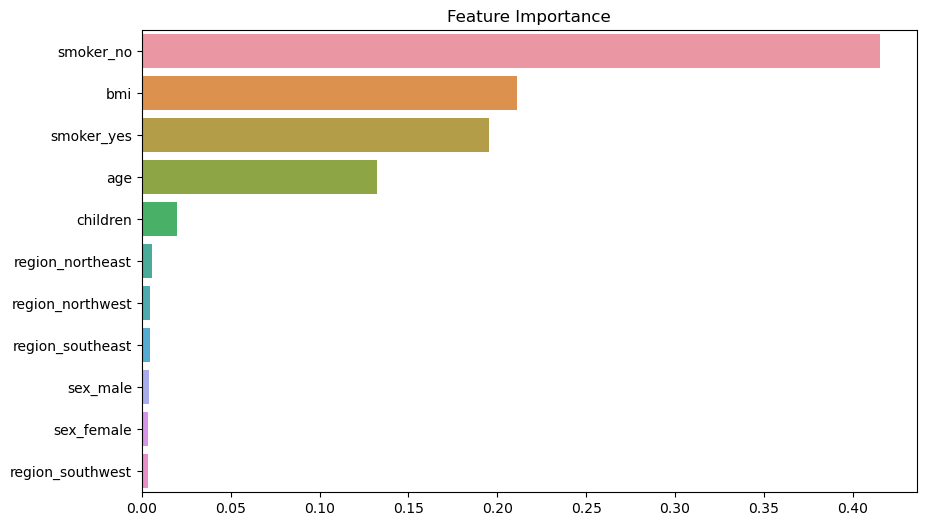

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv'
data = pd.read_csv(url)


categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']
numerical_transformer = StandardScaler()


categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}
for model_name, model in models.items():
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[model_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }


results_df = pd.DataFrame(results).T
print(results_df)


best_model = models['Random Forest']
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_model)])
pipeline.fit(X_train, y_train)
importance = pipeline.named_steps['model'].feature_importances_
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()
